In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load the Titanic dataset from seaborn (or any available source)


In [2]:
import seaborn as sns
data = sns.load_dataset('titanic')

# Preprocess the dataset
# Drop rows with missing target values

In [3]:

data = data.dropna(subset=['age', 'embarked', 'sex', 'fare', 'class', 'survived'])



# Select relevant features and target

In [4]:

X = data[['age', 'fare', 'class', 'sex', 'embarked']]
y = data['survived']


# One-hot encode categorical features


In [5]:
X = pd.get_dummies(X, columns=['class', 'sex', 'embarked'], drop_first=True)



# Standardize the numerical features


In [6]:
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])




# Split the data into training and testing sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Initialize models

In [8]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'SVC (probability)': SVC(probability=True, random_state=42),
    'K-Neighbors': KNeighborsClassifier()
}


# Plot ROC curves


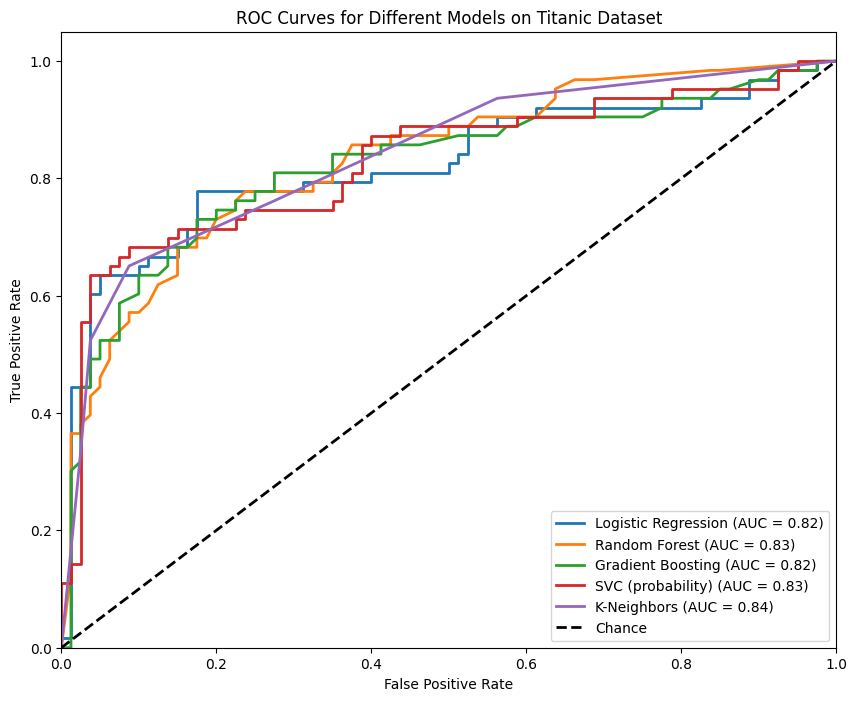

In [9]:
# Dictionary to store ROC/AUC results
roc_auc_results = {}

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    roc_auc_results[model_name] = roc_auc

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models on Titanic Dataset')
plt.legend(loc="best")
plt.show()


# Display AUC results

In [10]:

print("\nAUC Scores:")
for model_name, auc_score in roc_auc_results.items():
    print(f"{model_name}: {auc_score:.2f}")



AUC Scores:
Logistic Regression: 0.82
Random Forest: 0.83
Gradient Boosting: 0.82
SVC (probability): 0.83
K-Neighbors: 0.84


#Conclusion:

1. The K-Neighbors classifier achieved the highest AUC score (0.84), indicating it performs the best among the models tested.
2. Logistic Regression, Gradient Boosting, and SVC (probability) all have similar AUC scores (around 0.82-0.83), suggesting comparable performance.
3. Random Forest and SVC (probability) also show strong results, with AUC scores of 0.83, making them reliable alternatives to K-Neighbors.